In [366]:
from __future__ import print_function
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math
import os
import cv2
import kornia
import numbers
import matplotlib.pyplot as plt
from PIL import Image
from network import *

(256, 192, 3)


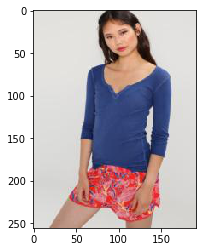

In [367]:
pth = "/home/fashionteam/viton_resize/test/image"
img_list = os.listdir(pth)
img_pth = os.path.join(pth, img_list[25])
image = Image.open(img_pth)
_image = np.asarray(image)
image = _image
print(image.shape)
plt.imshow(np.asarray(image))

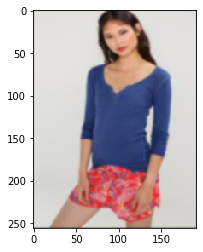

In [368]:
# After Gaussian

gauss = GaussianSmoothing()
image = torch.tensor(_image, dtype=torch.float32).transpose(2, 1).transpose(1, 0).unsqueeze(0)

x = gauss(image)
plt.imshow(x.squeeze(0).transpose(0, 1).transpose(1, 2).type(torch.int32))

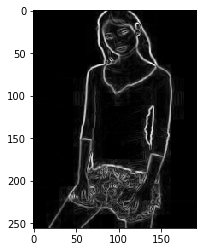

In [369]:
# Sobel Output

sobel = Sobel()
magnitude, direction = sobel(image)
plt.imshow(magnitude.squeeze(0).type(torch.int32), cmap="gray")

In [370]:
suppressed_lst = []
for d in dir_filters():
    curr_dir = ClipValues(
        min_value = d['min_angle'],
        max_value = d['max_angle'],
        )(direction)
    curr_nms = NonMaximumSuppression(
        mask = d['filter']
        )(magnitude)
    curr_suppressed = Multiply()(
        [curr_nms, curr_dir]
        )
    suppressed_lst.append(curr_suppressed)
    
suppressed = Addition()(suppressed_lst)

THRES = 20  # Decide the low threshold
low_thresh = ThresholdLayer()(suppressed, THRES) 

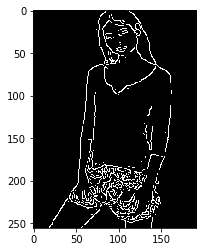

In [371]:
# implemented Canny Network - Differentiable

plt.imshow(low_thresh[0][0], cmap="gray")

(256, 192)


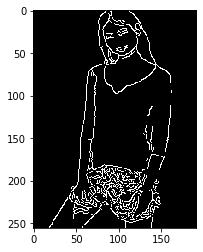

In [372]:
# Opencv Canny Network - NOT differentiable

edges = cv2.Canny(_image,20,255)
print(edges.shape)
plt.imshow(edges, cmap="gray")